In [1]:
from data_cleaner import *
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%load_ext autoreload
%autoreload 2

In [2]:
# load in the data
box_office_gross = pd.read_csv('bom.movie_gross.csv')
name_basics = pd.read_csv('name.basics.csv')
rt_info = pd.read_csv('rt.movie_info.tsv', delimiter='\t')
rt_reviews = pd.read_csv('rt.reviews.tsv', delimiter='\t', encoding = 'unicode_escape')
alt_title_names = pd.read_csv('title.akas.csv')
title_basics = pd.read_csv('title.basics.csv')
title_crew = pd.read_csv('title.crew.csv')
title_principals = pd.read_csv('title.principals.csv')
title_ratings = pd.read_csv('title.ratings.csv')
tmdb_movies = pd.read_csv('tmdb.movies.csv')
movie_budgets = pd.read_csv('tn.movie_budgets.csv')

# Question 2: Cast/Producer/Writer/Director Performance
## Merge the IMDB files
name_basics, title_basics, title_crew, title_principals, title_ratings, box_office_gross

In [3]:
new_name_basics = name_basics[['nconst', 'primary_name']]
new_basic_title = title_basics[['tconst', 'primary_title']]
new_crew_title = title_crew[['tconst', 'directors', 'writers']]
new_principals_title = title_principals[['tconst', 'nconst']]
new_ratings_title = title_ratings[['tconst', 'averagerating', 'numvotes']]
title_alias = alt_title_names[['title_id', 'title', 'region']]

In [4]:
title_alias.rename(columns={'title_id': 'tconst'})

,tconst,title,region
0,tt0369610,Джурасик свят,BG
1,tt0369610,Jurashikku warudo,JP
2,tt0369610,Jurassic World: O Mundo dos Dinossauros,BR
3,tt0369610,O Mundo dos Dinossauros,BR
4,tt0369610,Jurassic World,FR
...,...,...,...
331698,tt9827784,Sayonara kuchibiru,NaN
331699,tt9827784,Farewell Song,XWW
331700,tt9880178,La atención,NaN
331701,tt9880178,La atención,ES


In [5]:
title_alias.dropna(inplace=True)

C:\Users\Gideon\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [6]:
title_alias.head()

,title_id,title,region
0,tt0369610,Джурасик свят,BG
1,tt0369610,Jurashikku warudo,JP
2,tt0369610,Jurassic World: O Mundo dos Dinossauros,BR
3,tt0369610,O Mundo dos Dinossauros,BR
4,tt0369610,Jurassic World,FR


In [7]:
to_remove = title_alias.loc[title_alias['region'] != 'US']
to_remove.head()

,title_id,title,region
0,tt0369610,Джурасик свят,BG
1,tt0369610,Jurashikku warudo,JP
2,tt0369610,Jurassic World: O Mundo dos Dinossauros,BR
3,tt0369610,O Mundo dos Dinossauros,BR
4,tt0369610,Jurassic World,FR


In [8]:
title_alias.drop(index=to_remove.index, inplace=True)
title_alias.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51490 entries, 12 to 331694
Data columns (total 3 columns):
title_id    51490 non-null object
title       51490 non-null object
region      51490 non-null object
dtypes: object(3)
memory usage: 1.6+ MB


C:\Users\Gideon\Anaconda3\lib\site-packages\pandas\core\frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [9]:
title_alias.head()

,title_id,title,region
12,tt0369610,Jurassic World 3D,US
20,tt0369610,Jurassic World,US
21,tt0369610,Ebb Tide,US
28,tt0369610,Jurassic Park IV,US
37,tt0369610,Jurassic Park 4,US


In [10]:
movie_budgets.drop_duplicates(subset='movie', inplace=True)
movie_budgets['movie'].value_counts()

Hannibal                                             1
The Lord of the Rings: The Fellowship of the Ring    1
Teacher's Pet: The Movie                             1
Boogeyman                                            1
Buffalo Soldiers                                     1
                                                    ..
The Children of Huang Shi                            1
Party Monster                                        1
Meet the Mormons                                     1
Rotor DR1                                            1
Sunshine                                             1
Name: movie, Length: 5698, dtype: int64

In [11]:
money_values_to_integer(movie_budgets, 'production_budget')
money_values_to_integer(movie_budgets, 'worldwide_gross')

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,425000000.0,"$760,507,625",2.776345e+09
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000.0,"$241,063,875",1.045664e+09
2,3,"Jun 7, 2019",Dark Phoenix,350000000.0,"$42,762,350",1.497624e+08
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000.0,"$459,005,868",1.403014e+09
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000.0,"$620,181,382",1.316722e+09
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,NaN,$0,NaN
5778,79,"Apr 2, 1999",Following,NaN,"$48,482",NaN
5779,80,"Jul 13, 2005",Return to the Land of Wonders,NaN,"$1,338",NaN
5780,81,"Sep 29, 2015",A Plague So Pleasant,NaN,$0,NaN


In [12]:
movie_budgets['profitability'] = movie_budgets['worldwide_gross']/movie_budgets['production_budget']

In [13]:
movie_budgets

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,profitability
0,1,"Dec 18, 2009",Avatar,425000000.0,"$760,507,625",2.776345e+09,6.532577
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000.0,"$241,063,875",1.045664e+09,2.546673
2,3,"Jun 7, 2019",Dark Phoenix,350000000.0,"$42,762,350",1.497624e+08,0.427892
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000.0,"$459,005,868",1.403014e+09,4.243841
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000.0,"$620,181,382",1.316722e+09,4.153696
...,...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,NaN,$0,NaN,NaN
5778,79,"Apr 2, 1999",Following,NaN,"$48,482",NaN,NaN
5779,80,"Jul 13, 2005",Return to the Land of Wonders,NaN,"$1,338",NaN,NaN
5780,81,"Sep 29, 2015",A Plague So Pleasant,NaN,$0,NaN,NaN


In [14]:
movie_budgets.rename(columns={'movie': 'title'}, inplace=True)
budgets_and_aliases = pd.merge(title_alias, movie_budgets, on='title')
budgets_and_aliases.tail()

,title_id,title,region,id,release_date,production_budget,domestic_gross,worldwide_gross,profitability
2219,tt4651520,Bad Moms,US,99,"Jul 29, 2016",20000000.0,"$113,257,297",56398162.0,2.819908
2220,tt5462602,The Big Sick,US,64,"Jun 23, 2017",5000000.0,"$42,872,467",12232628.0,2.446526
2221,tt5649108,Thoroughbreds,US,47,"Mar 9, 2018",5000000.0,"$3,072,605",0.0,0.000000
2222,tt6139732,Aladdin,US,81,"May 24, 2019",182000000.0,"$246,734,314",619234314.0,3.402386
2223,tt6139732,Aladdin,US,81,"May 24, 2019",182000000.0,"$246,734,314",619234314.0,3.402386


In [15]:
movies_to_remove = budgets_and_aliases.loc[(budgets_and_aliases['worldwide_gross'] <= 10000000)]
movies_to_remove.head()
budgets_and_aliases.drop(index=movies_to_remove.index, inplace=True)

In [25]:
gross_and_titles = budgets_and_aliases[['title_id', 'title', 'worldwide_gross', 'profitability']]
gross_and_titles.head()

,title_id,title,worldwide_gross,profitability
0,tt0369610,Jurassic World,1.648855e+09,7.669092
1,tt0401729,John Carter,2.827781e+08,1.028284
2,tt1014759,Alice in Wonderland,1.025491e+09,5.127456
3,tt1926979,Alice in Wonderland,1.025491e+09,5.127456
4,tt2049386,Alice in Wonderland,1.025491e+09,5.127456


In [26]:
gross_and_titles['title'].value_counts()

The Return         9
Home               8
Redemption         7
Freedom            6
Stuck              6
                  ..
Foreign Letters    1
Fury               1
August             1
Minions            1
The Predator       1
Name: title, Length: 1235, dtype: int64

In [27]:
gross_and_titles.drop_duplicates(subset='title', inplace=True)
gross_and_titles

C:\Users\Gideon\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,title_id,title,worldwide_gross,profitability
0,tt0369610,Jurassic World,1.648855e+09,7.669092
1,tt0401729,John Carter,2.827781e+08,1.028284
2,tt1014759,Alice in Wonderland,1.025491e+09,5.127456
5,tt1194173,The Bourne Legacy,2.383178e+08,1.906543
6,tt1219289,Limitless,2.139205e+07,0.792298
...,...,...,...,...
2217,tt3348730,Jigsaw,2.871767e+07,2.871767
2218,tt3829266,The Predator,1.487153e+08,1.729248
2219,tt4651520,Bad Moms,5.639816e+07,2.819908
2220,tt5462602,The Big Sick,1.223263e+07,2.446526


In [28]:
gross_and_titles.title.value_counts()

The BFG                                1
The Artist                             1
The Rite                               1
Vacation                               1
The Longest Ride                       1
                                      ..
Goosebumps                             1
On the Basis of Sex                    1
Captain America: The Winter Soldier    1
Ricki and the Flash                    1
The Predator                           1
Name: title, Length: 1235, dtype: int64

In [29]:
gross_and_titles

,title_id,title,worldwide_gross,profitability
0,tt0369610,Jurassic World,1.648855e+09,7.669092
1,tt0401729,John Carter,2.827781e+08,1.028284
2,tt1014759,Alice in Wonderland,1.025491e+09,5.127456
5,tt1194173,The Bourne Legacy,2.383178e+08,1.906543
6,tt1219289,Limitless,2.139205e+07,0.792298
...,...,...,...,...
2217,tt3348730,Jigsaw,2.871767e+07,2.871767
2218,tt3829266,The Predator,1.487153e+08,1.729248
2219,tt4651520,Bad Moms,5.639816e+07,2.819908
2220,tt5462602,The Big Sick,1.223263e+07,2.446526


In [30]:
title_crew.rename(columns={'tconst': 'title_id'}, inplace=True)
title_crew.dropna(inplace=True)
title_crew.groupby(by='title_id').head()

,title_id,directors,writers
0,tt0285252,nm0899854,nm0899854
2,tt0462036,nm1940585,nm1940585
3,tt0835418,nm0151540,"nm0310087,nm0841532"
4,tt0878654,"nm0089502,nm2291498,nm2292011",nm0284943
6,tt0996958,nm2286991,"nm2286991,nm2651190"
...,...,...,...
146137,tt8998302,nm10121510,nm10121510
146138,tt8999892,nm10122247,"nm10122247,nm10122246"
146139,tt8999974,nm10122357,nm10122357
146140,tt9001390,nm6711477,nm6711477


In [31]:
crew_and_gross = pd.merge(title_crew, gross_and_titles, on='title_id')
crew_and_gross

,title_id,directors,writers,title,worldwide_gross,profitability
0,tt0999913,nm0527109,"nm0527109,nm0329051,nm0001603,nm0930684",Straw Dogs,12850033.0,0.514001
1,tt1125929,nm0000431,nm0414893,Love Ranch,156229050.0,6.509544
2,tt1126618,nm0585011,nm0112459,Morning Glory,27682712.0,0.692068
3,tt1336608,nm0788202,"nm0857620,nm0195476,nm1615610",Rock of Ages,69157016.0,0.987957
4,tt1411664,nm0103744,"nm0001191,nm0184445,nm0841910",Bucky Larson: Born to Be a Star,42226657.0,4.222666
...,...,...,...,...,...,...
1189,tt3157318,nm4179560,"nm0171108,nm4179560",Dawn of the Crescent Moon,NaN,NaN
1190,tt3464902,nm0487166,"nm0487166,nm3328207",The Lobster,36000000.0,9.000000
1191,tt7368554,nm0838499,"nm0503931,nm0838499",The Interpreter,157092943.0,1.745477
1192,tt7634968,nm0788202,"nm1202276,nm0404752,nm0339733,nm1944708,nm0326...",What Men Want,44821299.0,2.241065


In [34]:
crew_and_gross.rename(columns={'directors': 'nameconstant'}, inplace=True)
new_name_basics.rename(columns={'nconst': 'nameconstant'}, inplace=True)
crew_and_gross

C:\Users\Gideon\Anaconda3\lib\site-packages\pandas\core\frame.py:4223: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(**kwargs)


,title_id,nameconstant,writers,title,worldwide_gross,profitability
0,tt0999913,nm0527109,"nm0527109,nm0329051,nm0001603,nm0930684",Straw Dogs,12850033.0,0.514001
1,tt1125929,nm0000431,nm0414893,Love Ranch,156229050.0,6.509544
2,tt1126618,nm0585011,nm0112459,Morning Glory,27682712.0,0.692068
3,tt1336608,nm0788202,"nm0857620,nm0195476,nm1615610",Rock of Ages,69157016.0,0.987957
4,tt1411664,nm0103744,"nm0001191,nm0184445,nm0841910",Bucky Larson: Born to Be a Star,42226657.0,4.222666
...,...,...,...,...,...,...
1189,tt3157318,nm4179560,"nm0171108,nm4179560",Dawn of the Crescent Moon,NaN,NaN
1190,tt3464902,nm0487166,"nm0487166,nm3328207",The Lobster,36000000.0,9.000000
1191,tt7368554,nm0838499,"nm0503931,nm0838499",The Interpreter,157092943.0,1.745477
1192,tt7634968,nm0788202,"nm1202276,nm0404752,nm0339733,nm1944708,nm0326...",What Men Want,44821299.0,2.241065


In [35]:
crew_names_and_gross = pd.merge(crew_and_gross, new_name_basics, on='nameconstant')
crew_names_and_gross

,title_id,nameconstant,writers,title,worldwide_gross,profitability,primary_name
0,tt0999913,nm0527109,"nm0527109,nm0329051,nm0001603,nm0930684",Straw Dogs,12850033.0,0.514001,Rod Lurie
1,tt1125929,nm0000431,nm0414893,Love Ranch,156229050.0,6.509544,Taylor Hackford
2,tt1904996,nm0000431,"nm0572352,nm0922799",Parker,24405825.0,0.697309,Taylor Hackford
3,tt1126618,nm0585011,nm0112459,Morning Glory,27682712.0,0.692068,Roger Michell
4,tt1336608,nm0788202,"nm0857620,nm0195476,nm1615610",Rock of Ages,69157016.0,0.987957,Adam Shankman
...,...,...,...,...,...,...,...
1092,tt1741273,nm0712753,"nm0712753,nm0002728,nm3160078",Secret in Their Eyes,16612072.0,0.830604,Billy Ray
1093,tt2467046,nm0002184,"nm0420874,nm0481542,nm0482510,nm1146036",Left Behind,41382841.0,2.299047,Vic Armstrong
1094,tt3148952,nm0369442,"nm0369442,nm2789152,nm2319441,nm2497348",The Circle,27147349.0,1.508186,Stefan Haupt
1095,tt3157318,nm4179560,"nm0171108,nm4179560",Dawn of the Crescent Moon,NaN,NaN,Kirk Loudon


In [68]:
profitability_by_director = crew_names_and_gross.groupby(by='primary_name').mean()

In [69]:
profitability_by_director.dropna(inplace=True)

In [70]:
number_of_movies_by_director = crew_names_and_gross.groupby(by='primary_name').size()

In [71]:
number_of_movies_by_director.dropna(inplace=True)

In [72]:
type(number_of_movies_by_director)

pandas.core.series.Series

In [73]:
type(profitability_by_director)

pandas.core.frame.DataFrame

In [74]:
profitability_by_director['num_of_movies'] = number_of_movies_by_director

In [76]:
multi_movie_directors = profitability_by_director.loc[profitability_by_director['num_of_movies'] >= 3]

In [81]:
multi_movie_directors.sort_values(by='profitability', ascending=False, inplace=True)
multi_movie_directors.head(20)

C:\Users\Gideon\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,worldwide_gross,profitability,num_of_movies
primary_name,,,
James Gray,2.579304e+08,12.019347,3
David O. Russell,1.698590e+08,5.952060,4
James Wan,6.113479e+08,5.885702,3
Tyler Perry,1.063348e+08,5.217524,7
David Fincher,3.034632e+08,5.070325,3
Carlos Saldanha,5.130876e+08,4.609574,3
Wes Ball,2.537616e+08,4.449094,3
Ridley Scott,4.941934e+08,4.346351,3
David F. Sandberg,4.568528e+08,4.240509,3


In [90]:
top_multi_movie_directors = multi_movie_directors.iloc[0:20]
top_multi_movie_directors.reset_index(inplace=True)

In [91]:
top_multi_movie_directors

,primary_name,worldwide_gross,profitability,num_of_movies
0,James Gray,2.579304e+08,12.019347,3
1,David O. Russell,1.698590e+08,5.952060,4
2,James Wan,6.113479e+08,5.885702,3
3,Tyler Perry,1.063348e+08,5.217524,7
4,David Fincher,3.034632e+08,5.070325,3
5,Carlos Saldanha,5.130876e+08,4.609574,3
6,Wes Ball,2.537616e+08,4.449094,3
7,Ridley Scott,4.941934e+08,4.346351,3
8,David F. Sandberg,4.568528e+08,4.240509,3
9,Jon Favreau,6.194679e+08,4.224581,3


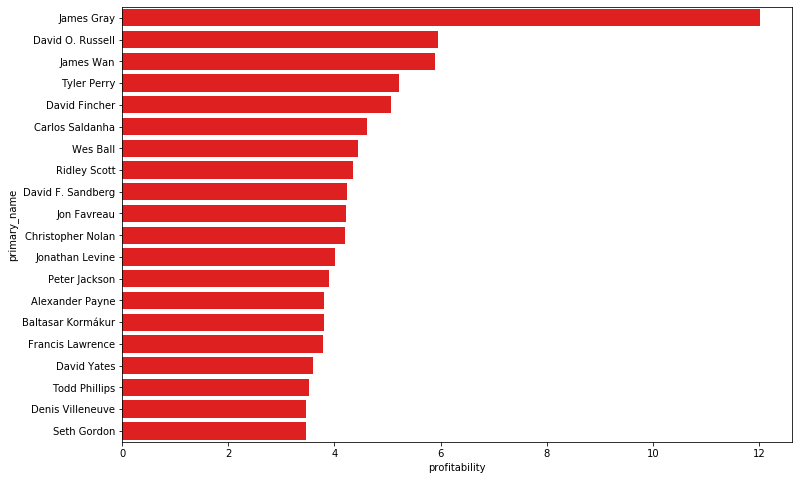

In [102]:
plt.figure(figsize=(12,8))
ax = sns.barplot(y='primary_name', x='profitability', data=top_multi_movie_directors, color='r')